In [2]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# 加载模型和分词器
model_name = 'models/bert-tiny-finetuned-sms-spam-detection'
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# 打印模型结构
print(model)


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 128, padding_idx=0)
      (position_embeddings): Embedding(512, 128)
      (token_type_embeddings): Embedding(2, 128)
      (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-1): 2 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=128, out_features=128, bias=True)
              (key): Linear(in_features=128, out_features=128, bias=True)
              (value): Linear(in_features=128, out_features=128, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=128, out_features=128, bias=True)
              (LayerNorm): LayerNorm((128,), eps=1e-1

c:\Users\86135\miniconda3\envs\LLM\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [12]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# 加载模型和分词器
model_name = 'models/bert-tiny-finetuned-sms-spam-detection'
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)
model.eval()

# 打印模型结构
print(model)


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 128, padding_idx=0)
      (position_embeddings): Embedding(512, 128)
      (token_type_embeddings): Embedding(2, 128)
      (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-1): 2 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=128, out_features=128, bias=True)
              (key): Linear(in_features=128, out_features=128, bias=True)
              (value): Linear(in_features=128, out_features=128, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=128, out_features=128, bias=True)
              (LayerNorm): LayerNorm((128,), eps=1e-1

c:\Users\86135\miniconda3\envs\LLM\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [3]:
for name, layer in model.named_children():
    print(f"{name}: {layer}")

bert: BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 128, padding_idx=0)
    (position_embeddings): Embedding(512, 128)
    (token_type_embeddings): Embedding(2, 128)
    (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-1): 2 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=128, out_features=128, bias=True)
            (key): Linear(in_features=128, out_features=128, bias=True)
            (value): Linear(in_features=128, out_features=128, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=128, out_features=128, bias=True)
            (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=F

In [4]:
print(model.config)

BertConfig {
  "_name_or_path": "models/bert-tiny-finetuned-sms-spam-detection",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 128,
  "initializer_range": 0.02,
  "intermediate_size": 512,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 2,
  "num_hidden_layers": 2,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.44.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}



In [8]:
import torch

model_name = 'models/bert-tiny-finetuned-sms-spam-detection'
model = AutoModelForSequenceClassification.from_pretrained(model_name)

text = "Free money, click now!"

# 对输入文本进行分词
inputs = tokenizer(text, return_tensors="pt")

# 将输入放到 GPU 上进行推理（如果有 GPU）
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
inputs = {key: value.to(device) for key, value in inputs.items()}

# 推理
with torch.no_grad():
    outputs = model(**inputs)

# 获取预测结果
predictions = torch.argmax(outputs.logits, dim=-1)
print(predictions)

tensor([0], device='cuda:0')


c:\Users\86135\miniconda3\envs\LLM\lib\site-packages\transformers\models\bert\modeling_bert.py:439: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


In [9]:
predictions

tensor([0], device='cuda:0')

In [10]:
predictions==0

tensor([True], device='cuda:0')

In [7]:
from transformers import Trainer, TrainingArguments, AutoModelForSequenceClassification
from transformers import AutoTokenizer
from datasets import load_dataset
import torch

# 加载模型和数据集
model_name = 'models/bert-tiny-finetuned-sms-spam-detection'
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# 加载数据集
dataset = load_dataset("datasets/sms_spam")

# 数据预处理
def preprocess_function(examples):
    return tokenizer(examples['sms'], padding=True, truncation=True, return_tensors="pt")

encoded_dataset = dataset.map(preprocess_function, batched=True)

# 定义训练参数
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
)

# 训练模型
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=encoded_dataset["train"],
    eval_dataset=encoded_dataset["train"],
)

# 使用量化训练进行模型量化
trainer.train()

# 保存量化后的模型
trainer.save_model("./quantized_model")


  0%|          | 0/2091 [00:00<?, ?it/s]

ValueError: expected sequence of length 131 at dim 1 (got 100)

In [8]:
from transformers import Trainer, TrainingArguments, AutoModelForSequenceClassification
from transformers import AutoTokenizer
from datasets import load_dataset
import torch

# 加载模型和数据集
model_name = 'models/bert-tiny-finetuned-sms-spam-detection'
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# 加载数据集
dataset = load_dataset("datasets/sms_spam")

# 数据预处理函数：填充到最大长度
def preprocess_function(examples):
    return tokenizer(
        examples['sms'], 
        padding="max_length",  # 填充到最大长度
        truncation=True,       # 截断超出最大长度的部分
        max_length=128,        # 设置最大长度为 128
        return_tensors="pt"
    )

# 编码数据集
encoded_dataset = dataset.map(preprocess_function, batched=True)

# 定义训练参数
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
)

# 训练模型
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=encoded_dataset["train"],
    eval_dataset=encoded_dataset["train"],
)

# 使用量化训练进行模型量化（如果你希望启用量化，请确保正确安装相关库和依赖）
trainer.train()

# 保存量化后的模型
trainer.save_model("./quantized_model")


Map: 100%|██████████| 5574/5574 [00:00<00:00, 14718.12 examples/s]
c:\Users\86135\miniconda3\envs\LLM\lib\site-packages\transformers\models\bert\modeling_bert.py:439: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(
                                        
  0%|          | 0/2091 [02:18<?, ?it/s]           

{'loss': 0.0754, 'grad_norm': 0.22201311588287354, 'learning_rate': 1.5217599234815878e-05, 'epoch': 0.72}






















                                        
                                                

  0%|          | 0/2091 [02:22<?, ?it/s]          



{'eval_loss': 0.05286308005452156, 'eval_runtime': 2.0236, 'eval_samples_per_second': 2754.487, 'eval_steps_per_second': 344.434, 'epoch': 1.0}


                                        
  0%|          | 0/2091 [02:24<?, ?it/s]           

{'loss': 0.057, 'grad_norm': 0.12996628880500793, 'learning_rate': 1.0435198469631755e-05, 'epoch': 1.43}






















                                        
                                                 

  0%|          | 0/2091 [02:29<?, ?it/s]          




{'eval_loss': 0.04397319629788399, 'eval_runtime': 2.0535, 'eval_samples_per_second': 2714.438, 'eval_steps_per_second': 339.426, 'epoch': 2.0}


                                         24.42it/s]
  0%|          | 0/2091 [02:30<?, ?it/s]           

{'loss': 0.0436, 'grad_norm': 0.09436282515525818, 'learning_rate': 5.652797704447634e-06, 'epoch': 2.15}


                                        
  0%|          | 0/2091 [02:34<?, ?it/s]            

{'loss': 0.0447, 'grad_norm': 0.09596673399209976, 'learning_rate': 8.703969392635103e-07, 'epoch': 2.87}





















                                        
                                                 

  0%|          | 0/2091 [02:37<?, ?it/s]          

                                        
100%|██████████| 2091/2091 [00:23<00:00, 88.67it/s] 

{'eval_loss': 0.040452904999256134, 'eval_runtime': 1.9229, 'eval_samples_per_second': 2898.737, 'eval_steps_per_second': 362.472, 'epoch': 3.0}
{'train_runtime': 23.5917, 'train_samples_per_second': 708.808, 'train_steps_per_second': 88.633, 'train_loss': 0.05617900786361074, 'epoch': 3.0}


In [10]:
accs=[0.9888769285970578,                                                                                                                                                                                                                                                                          
0.9921062073914604, 
0.9947972730534625,                                                                                                                                                                                                                                                                    
0.9955148905633298,                                                                                                                                                                  
0.996232508073197, 
0.9983853606027987,                                                                                                                                   
0.9983853606027987, 
0.9987441693577324,                                                                                                                                                 
0.9992823824901328,              
0.9987441693577324, 
0.9998205956225332,                                                                                                                                   
0.9996411912450663, 
0.9996411912450663,                                                                                                                                                                                                                                      
1.0]
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]



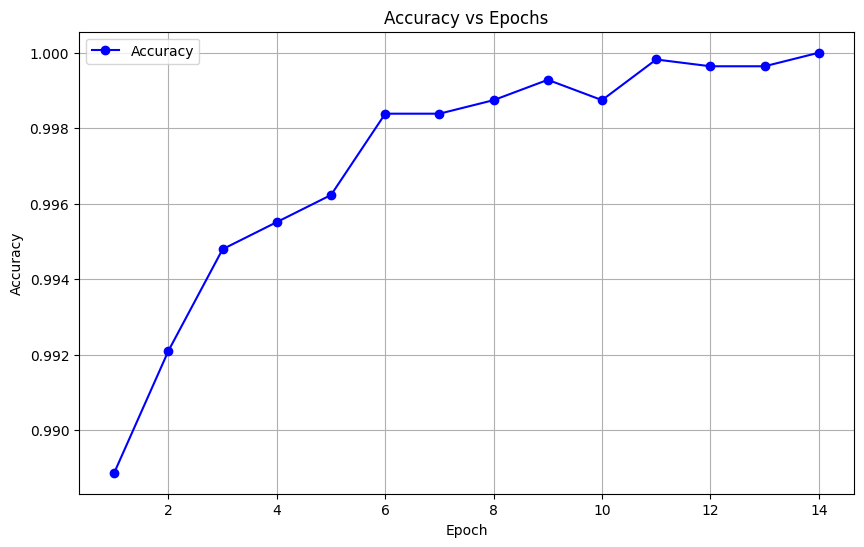

In [11]:
import matplotlib.pyplot as plt
# 创建一个新的图形
plt.figure(figsize=(10, 6))

# 绘制折线图
plt.plot(x, accs, marker='o', color='b', label='Accuracy')

# 设置标题
plt.title('Accuracy vs Epochs')

# 设置x轴标签
plt.xlabel('Epoch')

# 设置y轴标签
plt.ylabel('Accuracy')

# 显示网格
plt.grid(True)

# 添加图例
plt.legend()

# 显示图形
plt.show()